In [28]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import sys
import pickle
from keras.models import load_model
import matplotlib.pyplot as plt

In [62]:
df = pd.read_table("PAMAP2_Dataset\Protocol\subject102.dat", sep = "\s+", header = None)

In [63]:
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,5.64,0,NaN,33.000,2.791430,7.553890,-7.06374,2.875530,7.888230,-6.76139,...,-0.027148,-0.031190,-0.040897,-47.7695,-2.58701,59.8481,-0.012871,0.747947,-0.079841,0.658813
1,5.65,0,NaN,33.000,2.860860,7.438140,-7.21626,2.842480,7.631640,-6.85140,...,0.012803,-0.036384,-0.014846,-47.7624,-2.81438,60.3407,0.014025,-0.748410,0.079043,-0.658360
2,5.66,0,100.0,33.000,2.809970,7.094300,-7.52376,2.793730,7.435450,-7.07744,...,-0.001695,-0.034530,-0.040074,-47.5393,-2.38909,60.9623,0.012714,-0.749508,0.075286,-0.657577
3,5.67,0,NaN,33.000,2.771380,6.980770,-7.52396,2.806270,7.299290,-7.24326,...,0.055437,-0.011560,0.015434,-47.4246,-2.72082,60.7103,0.012639,-0.749201,0.076030,-0.657843
4,5.68,0,NaN,33.000,2.767100,7.131190,-7.67848,2.787660,7.117970,-7.48445,...,0.017184,-0.034663,0.007239,-47.5412,-2.60153,60.3412,0.012571,-0.749291,0.076346,-0.657705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446995,4475.59,0,NaN,29.125,-0.040828,-0.050765,9.77696,-0.007455,0.010854,9.76395,...,-0.045732,-0.003273,-0.002873,23.2899,13.04520,-52.9575,0.963468,0.150467,-0.152542,-0.160685
446996,4475.60,0,NaN,29.125,-0.004109,-0.013453,9.73890,-0.067866,-0.018901,9.77918,...,0.004529,-0.028774,-0.014796,23.7429,12.91400,-52.5913,0.963511,0.150692,-0.152539,-0.160219
446997,4475.61,0,NaN,29.125,-0.073003,-0.011192,9.93029,-0.067358,0.041505,9.77905,...,-0.016462,0.006235,-0.003494,23.1758,13.05240,-53.2040,0.963689,0.149824,-0.152549,-0.159953
446998,4475.62,0,NaN,29.125,0.189650,0.099912,9.85688,-0.067233,0.026430,9.80928,...,-0.009732,0.004279,-0.011372,23.2890,12.83110,-53.4549,0.963846,0.148631,-0.152432,-0.160234


In [64]:
for col in df.columns:
    if pd.isna(df.iloc[0, col]):
        df[col][0] = 0
    for row in range(1, len(df[col])):
        if pd.isna(df.iloc[row, col]):
            df[col][row] = df[col][row-1]

C:\Users\DHAIRYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DHAIRYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,5.64,0,0.0,33.000,2.791430,7.553890,-7.06374,2.875530,7.888230,-6.76139,...,-0.027148,-0.031190,-0.040897,-47.7695,-2.58701,59.8481,-0.012871,0.747947,-0.079841,0.658813
1,5.65,0,0.0,33.000,2.860860,7.438140,-7.21626,2.842480,7.631640,-6.85140,...,0.012803,-0.036384,-0.014846,-47.7624,-2.81438,60.3407,0.014025,-0.748410,0.079043,-0.658360
2,5.66,0,100.0,33.000,2.809970,7.094300,-7.52376,2.793730,7.435450,-7.07744,...,-0.001695,-0.034530,-0.040074,-47.5393,-2.38909,60.9623,0.012714,-0.749508,0.075286,-0.657577
3,5.67,0,100.0,33.000,2.771380,6.980770,-7.52396,2.806270,7.299290,-7.24326,...,0.055437,-0.011560,0.015434,-47.4246,-2.72082,60.7103,0.012639,-0.749201,0.076030,-0.657843
4,5.68,0,100.0,33.000,2.767100,7.131190,-7.67848,2.787660,7.117970,-7.48445,...,0.017184,-0.034663,0.007239,-47.5412,-2.60153,60.3412,0.012571,-0.749291,0.076346,-0.657705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446995,4475.59,0,134.0,29.125,-0.040828,-0.050765,9.77696,-0.007455,0.010854,9.76395,...,-0.045732,-0.003273,-0.002873,23.2899,13.04520,-52.9575,0.963468,0.150467,-0.152542,-0.160685
446996,4475.60,0,134.0,29.125,-0.004109,-0.013453,9.73890,-0.067866,-0.018901,9.77918,...,0.004529,-0.028774,-0.014796,23.7429,12.91400,-52.5913,0.963511,0.150692,-0.152539,-0.160219
446997,4475.61,0,134.0,29.125,-0.073003,-0.011192,9.93029,-0.067358,0.041505,9.77905,...,-0.016462,0.006235,-0.003494,23.1758,13.05240,-53.2040,0.963689,0.149824,-0.152549,-0.159953
446998,4475.62,0,134.0,29.125,0.189650,0.099912,9.85688,-0.067233,0.026430,9.80928,...,-0.009732,0.004279,-0.011372,23.2890,12.83110,-53.4549,0.963846,0.148631,-0.152432,-0.160234


In [66]:
data=df.drop(columns=[0,2,16,17,18,19,33,34,35,36,50,51,52,53])
data

,1,3,4,5,6,7,8,9,10,11,...,40,41,42,43,44,45,46,47,48,49
0,0,33.000,2.791430,7.553890,-7.06374,2.875530,7.888230,-6.76139,1.016400,-0.289410,...,-1.64674,9.73055,-0.846832,-1.29665,-0.027148,-0.031190,-0.040897,-47.7695,-2.58701,59.8481
1,0,33.000,2.860860,7.438140,-7.21626,2.842480,7.631640,-6.85140,1.082690,-0.393965,...,-1.80115,9.73049,-0.816601,-1.31189,0.012803,-0.036384,-0.014846,-47.7624,-2.81438,60.3407
2,0,33.000,2.809970,7.094300,-7.52376,2.793730,7.435450,-7.07744,1.148290,-0.521087,...,-1.76432,9.73032,-0.756157,-1.35749,-0.001695,-0.034530,-0.040074,-47.5393,-2.38909,60.9623
3,0,33.000,2.771380,6.980770,-7.52396,2.806270,7.299290,-7.24326,1.248880,-0.511985,...,-1.76223,9.70051,-0.816589,-1.29659,0.055437,-0.011560,0.015434,-47.4246,-2.72082,60.7103
4,0,33.000,2.767100,7.131190,-7.67848,2.787660,7.117970,-7.48445,1.271780,-0.525704,...,-2.03407,9.73043,-0.816620,-1.32702,0.017184,-0.034663,0.007239,-47.5412,-2.60153,60.3412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446995,0,29.125,-0.040828,-0.050765,9.77696,-0.007455,0.010854,9.76395,-0.028116,0.001145,...,8.72427,-3.49204,-2.319490,8.94918,-0.045732,-0.003273,-0.002873,23.2899,13.04520,-52.9575
446996,0,29.125,-0.004109,-0.013453,9.73890,-0.067866,-0.018901,9.77918,0.010495,0.006091,...,8.33824,-3.49223,-2.304420,8.90373,0.004529,-0.028774,-0.014796,23.7429,12.91400,-52.5913
446997,0,29.125,-0.073003,-0.011192,9.93029,-0.067358,0.041505,9.77905,-0.005155,0.028014,...,8.56932,-3.49223,-2.304420,8.90373,-0.016462,0.006235,-0.003494,23.1758,13.05240,-53.2040
446998,0,29.125,0.189650,0.099912,9.85688,-0.067233,0.026430,9.80928,-0.012021,0.011733,...,8.49265,-3.44704,-2.319500,8.93380,-0.009732,0.004279,-0.011372,23.2890,12.83110,-53.4549


In [67]:
data[1]

0         0
1         0
2         0
3         0
4         0
         ..
446995    0
446996    0
446997    0
446998    0
446999    0
Name: 1, Length: 447000, dtype: int64

In [68]:
lst=[]
for i in range(len(data)):
    if(data[1][i]==0):
        lst.append(i)

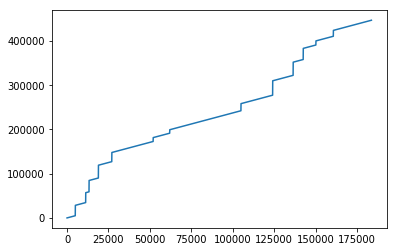

In [69]:
plt.plot(lst)

In [70]:
data.drop(lst,inplace=True)

In [71]:
data[1]

4956       1
4957       1
4958       1
4959       1
4960       1
          ..
424000    24
424001    24
424002    24
424003    24
424004    24
Name: 1, Length: 263349, dtype: int64

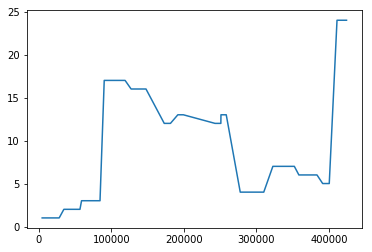

In [72]:
plt.plot(data[1])

In [73]:
data.index = range(len(data))
data.columns=range(len(data.columns))

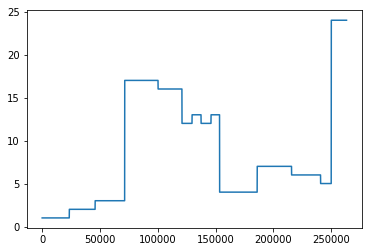

In [74]:
plt.plot(data[0])

In [75]:
data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1,33.4375,-6.88206,6.54265,2.839970,-6.73279,6.51666,2.764920,-0.003550,-0.046823,...,-1.99298,9.62448,-1.21010,-1.49168,0.040921,-0.066935,0.030631,-47.1271,0.458018,61.4844
1,1,33.4375,-6.84775,6.61723,2.724770,-6.76319,6.44141,2.810420,-0.012985,-0.025277,...,-2.26290,9.60939,-1.21012,-1.50673,0.041814,-0.012545,0.028780,-46.6862,0.562565,60.7392
2,1,33.4375,-6.96887,6.46467,2.531040,-6.73368,6.41095,2.765150,-0.013640,-0.017291,...,-1.99314,9.63931,-1.22527,-1.53712,0.033465,-0.033412,0.025411,-46.9033,0.343084,61.2338
3,1,33.4375,-6.85123,6.50274,2.648130,-6.77876,6.44146,2.750030,0.025889,0.010136,...,-1.95500,9.65413,-1.24045,-1.58255,0.051627,-0.052608,0.037883,-46.4507,0.104924,61.3513
4,1,33.4375,-6.80836,6.46585,2.802850,-6.73342,6.48641,2.719690,0.039428,-0.022150,...,-2.03159,9.63918,-1.22531,-1.56739,0.064291,-0.029521,0.035770,-46.5720,0.339549,60.6122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263344,24,28.5625,6.89559,6.13782,-0.608584,6.65593,6.59835,-0.329509,1.958890,0.007281,...,-2.41752,9.53326,-1.49779,-1.73243,-0.135496,-0.045599,0.065027,-36.0814,5.587010,36.0741
263345,24,28.5625,6.80903,6.47650,-0.995897,6.77081,6.29512,-0.706482,1.959530,0.003221,...,-1.83893,9.51845,-1.42211,-1.68719,-0.115623,-0.038048,0.076966,-36.1900,5.477260,36.3214
263346,24,28.5625,6.51286,7.16208,-0.964159,6.63710,6.70368,-0.888449,1.953730,0.030391,...,-2.06832,9.53353,-1.40696,-1.67219,-0.090784,-0.005824,0.059216,-35.9658,5.469380,36.3195
263347,24,28.5625,6.31694,8.07073,-1.355030,6.33989,7.33999,-1.025450,1.945550,-0.013632,...,-2.07049,9.54831,-1.37678,-1.73290,-0.089233,-0.012182,0.076491,-36.1976,5.813340,35.9537


In [76]:
data[40] = [1 if data[0][i] == 1 else 0 for i in range(len(data))]
data[41] = [1 if data[0][i] == 2 else 0 for i in range(len(data))]
data[42] = [1 if data[0][i] == 3 else 0 for i in range(len(data))]
data[43] = [1 if data[0][i] == 4 else 0 for i in range(len(data))]
data[44] = [1 if data[0][i] == 5 else 0 for i in range(len(data))]
data[45] = [1 if data[0][i] == 6 else 0 for i in range(len(data))]
data[46] = [1 if data[0][i] == 7 else 0 for i in range(len(data))]
data[47] = [1 if data[0][i] == 8 else 0 for i in range(len(data))]
data[48] = [1 if data[0][i] == 9 else 0 for i in range(len(data))]
data[49] = [1 if data[0][i] == 10 else 0 for i in range(len(data))]
data[50] = [1 if data[0][i] == 11 else 0 for i in range(len(data))]
data[51] = [1 if data[0][i] == 12 else 0 for i in range(len(data))]
data[52] = [1 if data[0][i] == 13 else 0 for i in range(len(data))]
data[53] = [1 if data[0][i] == 14 else 0 for i in range(len(data))]
data[54] = [1 if data[0][i] == 15 else 0 for i in range(len(data))]
data[55] = [1 if data[0][i] == 16 else 0 for i in range(len(data))]
data[56] = [1 if data[0][i] == 17 else 0 for i in range(len(data))]
data[57] = [1 if data[0][i] == 18 else 0 for i in range(len(data))]
data[58] = [1 if data[0][i] == 19 else 0 for i in range(len(data))]
data[59] = [1 if data[0][i] == 20 else 0 for i in range(len(data))]
data[60] = [1 if data[0][i] == 21 else 0 for i in range(len(data))]
data[61] = [1 if data[0][i] == 22 else 0 for i in range(len(data))]
data[62] = [1 if data[0][i] == 23 else 0 for i in range(len(data))]
data[63] = [1 if data[0][i] == 24 else 0 for i in range(len(data))]

In [77]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63],
           dtype='int64')

In [78]:
sum=0
for i in data.iloc[:,len(data.columns)-24:len(data.columns)].describe().iloc[1]:
    sum=sum+i
print(sum)

1.0


In [79]:
len(data.columns)

64

In [80]:
df2 = abs(data.iloc[:,1:len(data.columns)-24])
df_scaled = MinMaxScaler((0, 1)).fit_transform(df2.iloc[:,:len(df2.columns)])
df_scaled = np.around(df_scaled, decimals = 2)
df_scaled = pd.DataFrame(df_scaled)
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.83,0.10,0.08,0.03,0.12,0.11,0.04,0.00,0.0,0.00,...,0.02,0.16,0.02,0.03,0.00,0.01,0.00,0.45,0.01,0.42
1,0.83,0.10,0.08,0.02,0.12,0.11,0.05,0.00,0.0,0.00,...,0.02,0.16,0.02,0.03,0.00,0.00,0.00,0.45,0.01,0.41
2,0.83,0.10,0.08,0.02,0.12,0.11,0.04,0.00,0.0,0.00,...,0.02,0.16,0.02,0.03,0.00,0.00,0.00,0.45,0.00,0.42
3,0.83,0.10,0.08,0.02,0.12,0.11,0.04,0.00,0.0,0.00,...,0.02,0.16,0.02,0.03,0.00,0.00,0.00,0.45,0.00,0.42
4,0.83,0.10,0.08,0.03,0.12,0.11,0.04,0.00,0.0,0.01,...,0.02,0.16,0.02,0.03,0.00,0.00,0.00,0.45,0.00,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263344,0.05,0.10,0.07,0.01,0.12,0.11,0.01,0.09,0.0,0.15,...,0.02,0.15,0.02,0.04,0.01,0.00,0.01,0.35,0.08,0.25
263345,0.05,0.10,0.08,0.01,0.12,0.10,0.01,0.09,0.0,0.15,...,0.01,0.15,0.02,0.04,0.01,0.00,0.01,0.35,0.08,0.25
263346,0.05,0.09,0.08,0.01,0.12,0.11,0.01,0.09,0.0,0.15,...,0.02,0.15,0.02,0.03,0.01,0.00,0.01,0.35,0.08,0.25
263347,0.05,0.09,0.09,0.01,0.11,0.12,0.02,0.09,0.0,0.15,...,0.02,0.15,0.02,0.04,0.01,0.00,0.01,0.35,0.08,0.24


In [81]:
xdata = np.array(df_scaled)
xdata = [[xdata[i+j][0:len(df_scaled.columns)] for j in range(32)] for i in range(len(df_scaled) -32)]

ydata = np.array(data.iloc[:,40:64])
ydata = [ydata[i+32][:] for i in range(len(data) - 32)]

In [ ]:
xdata = np.array(xdata)
ydata = np.array(ydata)
print(xdata.shape,ydata.shape)

(263317, 32, 39) (263317, 24)


In [ ]:
np.save('npy\sub2_x', xdata)
np.save('npy\sub2_y', ydata)